In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle 

<h3>Processing Example</h3>

We can open an image with the open() function from PIL

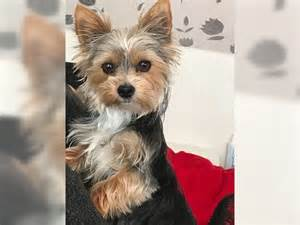

In [2]:
im = Image.open('dog/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg')
im

The original size of this image is 300x255. Images in the folder dogs and cats have very different sizes. We will resize everything to 64x64.

In [3]:
width, height = im.size
width, height

(300, 225)

In [6]:
IMSIZE = 64

if width >= height:
    new_width = IMSIZE
    new_height = int(IMSIZE*height/width)
else:
    new_height = IMSIZE
    new_width = int(IMSIZE*width/height)

new_width,new_height

(128, 96)

Since the images have different sizes and ratios, we will pad missing image region with 0 (represent the color black in pixel values)

In [13]:
im_rsz = im.resize([new_width,new_height])

In [19]:
im_prc = np.zeros([IMSIZE,IMSIZE,3],dtype=np.uint8)
im_prc[:new_height,:new_width,:] = im_rsz

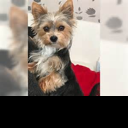

In [20]:
Image.fromarray(im_prc)

<h3>Processing all Images</h3>

Now we can write a function to automate the preprocessing of all images in a folder, then save the processed data to a pickle object

In [23]:
def process_image(image_path, IMSIZE):
    im = Image.open(image_path)
    width, height = im.size
    if width >= height:
        new_width = IMSIZE
        new_height = int(IMSIZE*height/width)
    else:
        new_height = IMSIZE
        new_width = int(IMSIZE*width/height)
    im_rsz = im.resize([new_width,new_height])
    im_prc = np.zeros([IMSIZE,IMSIZE,3],dtype=np.uint8)
    im_prc[:new_height,:new_width,:] = im_rsz
    return im_prc

We are not using the complete folders (dogs and cats) since they are fairly big. Instead, we get 1000 images from each for demonstration purpose in this module.

In [48]:
from os import listdir
from os.path import isfile, join

folder = 'dog'
filelist = [f for f in listdir(folder)]

dog_images = []
for file in filelist[:1000]:
    dog_images.append(process_image(folder+'/'+file, IMSIZE))

with open('dogs.obj','wb') as f:
    pickle.dump(dog_images, f)

In [49]:
folder = 'cat'
filelist = [f for f in listdir(folder)]

cat_images = []
for file in filelist[:1000]:
    cat_images.append(process_image(folder+'/'+file, IMSIZE))
    
with open('cats.obj','wb') as f:
    pickle.dump(cat_images, f)